In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import xgboost.sklearn as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
path = '/Users/macbookair/Downloads/project/上汽项目/新厂油漆车间数据.csv'

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ori_data = pd.read_csv(path)
row,col = ori_data.shape

In [3]:
ori_data

,data,EE,GAS,CT6,XT5,U358,TEMP,Humidity,Max_TEMP,Min_TEMP
0,2016/11/1,101041,27325,42.0,194.0,109.0,17.14,68.55,19.10,15.74
1,2016/11/2,131801,27234,29.0,305.0,62.0,14.19,58.77,15.62,12.83
2,2016/11/3,129470,26556,44.0,277.0,79.0,14.47,55.24,16.94,12.62
3,2016/11/4,122459,18505,37.0,209.0,121.0,15.04,57.96,19.59,11.46
4,2016/11/5,45702,0,0.0,0.0,0.0,17.28,60.18,22.59,12.52
5,2016/11/6,16081,2768,0.0,0.0,0.0,20.11,62.35,25.71,15.08
6,2016/11/7,106005,19108,9.0,192.0,178.0,20.30,71.53,23.60,16.96
7,2016/11/8,128447,28260,24.0,248.0,124.0,21.50,74.78,23.69,16.35
8,2016/11/9,129468,27977,37.0,255.0,112.0,13.22,68.23,16.50,11.95
9,2016/11/10,135438,29721,36.0,213.0,160.0,13.08,56.87,14.14,11.98


In [4]:
def newData(data):
    weekday = ori_data['data'].tolist()
    days = []
    for day in weekday:
        days.append(datetime.strptime(day,'%Y/%m/%d').weekday()+1)
    days = pd.DataFrame(days)
    days.columns = ['day']
    data = ori_data.join(days)
    work = np.array(data['U358'].tolist())
    workday = np.where(work>0,1,0)
    workday = pd.DataFrame(workday)
    workday.columns = ['workday']
    data = data.join(workday)
    return data
data = newData(ori_data)
new_date = []
weekday = ori_data['data'].tolist()
for month in weekday:
    new_date.append(int(month.split('/')[1]))
month = pd.DataFrame(new_date)
month.columns = ['month']
data = data.join(month)
nan = data[data.isnull().values==True].index.values
nan = np.unique(nan)
nanData = data.ix[nan]
nanindex0 = nanData[nanData['workday'] == 0].index.values
nanindex1 = nanData[nanData['workday'] == 1].index.values
data.ix[nanindex0] = data.ix[nanindex0].fillna(0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [5]:
data

,data,EE,GAS,CT6,XT5,U358,TEMP,Humidity,Max_TEMP,Min_TEMP,day,workday,month
0,2016/11/1,101041,27325,42.0,194.0,109.0,17.14,68.55,19.10,15.74,2,1,11
1,2016/11/2,131801,27234,29.0,305.0,62.0,14.19,58.77,15.62,12.83,3,1,11
2,2016/11/3,129470,26556,44.0,277.0,79.0,14.47,55.24,16.94,12.62,4,1,11
3,2016/11/4,122459,18505,37.0,209.0,121.0,15.04,57.96,19.59,11.46,5,1,11
4,2016/11/5,45702,0,0.0,0.0,0.0,17.28,60.18,22.59,12.52,6,0,11
5,2016/11/6,16081,2768,0.0,0.0,0.0,20.11,62.35,25.71,15.08,7,0,11
6,2016/11/7,106005,19108,9.0,192.0,178.0,20.30,71.53,23.60,16.96,1,1,11
7,2016/11/8,128447,28260,24.0,248.0,124.0,21.50,74.78,23.69,16.35,2,1,11
8,2016/11/9,129468,27977,37.0,255.0,112.0,13.22,68.23,16.50,11.95,3,1,11
9,2016/11/10,135438,29721,36.0,213.0,160.0,13.08,56.87,14.14,11.98,4,1,11


In [6]:
dummies = pd.get_dummies(data['day'],prefix='day')
data = data.join(dummies)
data = data.drop(['day'],axis=1)

In [7]:
dummies = pd.get_dummies(data['month'],prefix='month')
data = data.join(dummies)
data = data.drop(['month'],axis=1)

In [8]:
data

,data,EE,GAS,CT6,XT5,U358,TEMP,Humidity,Max_TEMP,Min_TEMP,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2016/11/1,101041,27325,42.0,194.0,109.0,17.14,68.55,19.10,15.74,...,0,0,0,0,0,0,0,0,1,0
1,2016/11/2,131801,27234,29.0,305.0,62.0,14.19,58.77,15.62,12.83,...,0,0,0,0,0,0,0,0,1,0
2,2016/11/3,129470,26556,44.0,277.0,79.0,14.47,55.24,16.94,12.62,...,0,0,0,0,0,0,0,0,1,0
3,2016/11/4,122459,18505,37.0,209.0,121.0,15.04,57.96,19.59,11.46,...,0,0,0,0,0,0,0,0,1,0
4,2016/11/5,45702,0,0.0,0.0,0.0,17.28,60.18,22.59,12.52,...,0,0,0,0,0,0,0,0,1,0
5,2016/11/6,16081,2768,0.0,0.0,0.0,20.11,62.35,25.71,15.08,...,0,0,0,0,0,0,0,0,1,0
6,2016/11/7,106005,19108,9.0,192.0,178.0,20.30,71.53,23.60,16.96,...,0,0,0,0,0,0,0,0,1,0
7,2016/11/8,128447,28260,24.0,248.0,124.0,21.50,74.78,23.69,16.35,...,0,0,0,0,0,0,0,0,1,0
8,2016/11/9,129468,27977,37.0,255.0,112.0,13.22,68.23,16.50,11.95,...,0,0,0,0,0,0,0,0,1,0
9,2016/11/10,135438,29721,36.0,213.0,160.0,13.08,56.87,14.14,11.98,...,0,0,0,0,0,0,0,0,1,0


In [9]:
data['CT6'] = data['CT6']*(125.1/(156.7+125.1+123.8))
data['XT5'] = data['XT5']*(123.8/(156.7+125.1+123.8))
data['U358'] = data['U358']*(156.7/(156.7+125.1+123.8))

In [10]:
data = data.drop(['data'],axis=1)

In [11]:
ee = data.values[:,0]
gas = data.values[:,1]
x  = data.values[:,2:16]
m = np.shape(ee)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,ee, test_size=0.5, random_state=0)
parameters = {'max_depth':([3,4,5,6,7,8,9,10,13,15]),'learning_rate':(0.01,0.015,0.02,0.025,0.03,0.04,0.05,0.06,0.09,0.1),'n_estimators':[100,125,150,200,250,300,1000]}
xlf=xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=300)
clf = GridSearchCV(xlf,parameters,n_jobs=-1,cv=5)
clf.fit(X_train,y_train)
print(clf.best_score_,clf.best_params_)

[0]	validation_0-rmse:116939
Will train until validation_0-rmse hasn't improved in 300 rounds.
[1]	validation_0-rmse:105546
[2]	validation_0-rmse:95292.8
[3]	validation_0-rmse:86080.9
[4]	validation_0-rmse:77754.4
[5]	validation_0-rmse:70292.4
[6]	validation_0-rmse:63562.8
[7]	validation_0-rmse:57556.8
[8]	validation_0-rmse:52124.8
[9]	validation_0-rmse:47219.3
[10]	validation_0-rmse:42907.9
[11]	validation_0-rmse:38994.7
[12]	validation_0-rmse:35570.2
[13]	validation_0-rmse:32417.5
[14]	validation_0-rmse:29626.8
[15]	validation_0-rmse:27103.9
[16]	validation_0-rmse:24998.1
[17]	validation_0-rmse:23080.1
[18]	validation_0-rmse:21336.9
[19]	validation_0-rmse:19858
[20]	validation_0-rmse:18509.2
[21]	validation_0-rmse:17406.7
[22]	validation_0-rmse:16480.9
[23]	validation_0-rmse:15599.2
[24]	validation_0-rmse:14881.8
[25]	validation_0-rmse:14276
[26]	validation_0-rmse:13785.4
[27]	validation_0-rmse:13362.7
[28]	validation_0-rmse:12932.2
[29]	validation_0-rmse:12601
[30]	validation_0-rmse

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,ee,test_size=0.5, random_state=0)
xlf = xgb.XGBRegressor(max_depth=3, 
                        learning_rate=0.03, 
                        n_estimators=200, 
                        silent=True, 
                        objective='reg:linear', 
                        nthread=-1, 
                        gamma=0,
                        min_child_weight=1, 
                        max_delta_step=0, 
                        subsample=0.85, 
                        colsample_bytree=0.7, 
                        colsample_bylevel=1, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        scale_pos_weight=1, 
                        seed=1440, 
                        missing=None)

xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=1000)
preds = xlf.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [213, 426]

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213]


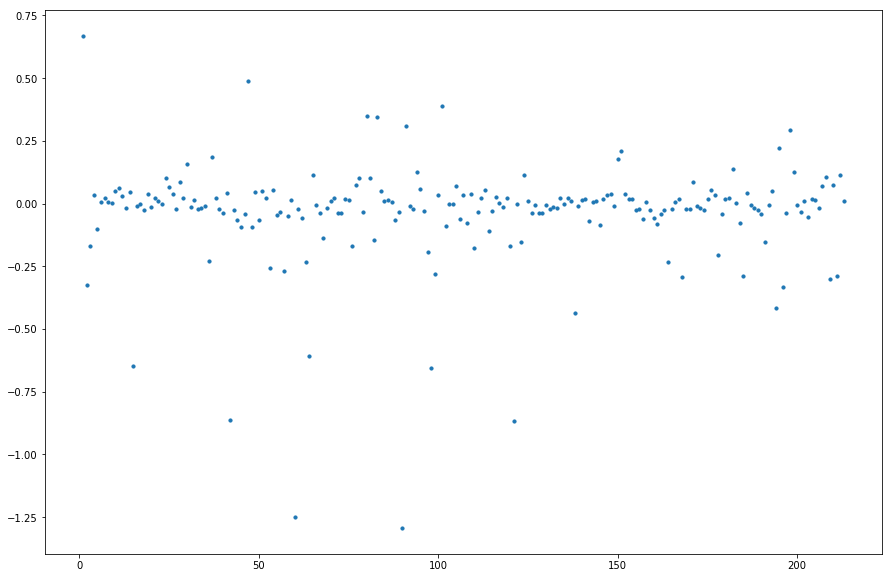

In [32]:
rmse = ((y_test-preds)/y_test)
# print(np.shape(rmse))
# score = r2_score(y_test,preds)
plt.figure(figsize=(15,10))
# plt.title('$Electric Energy Prediction$  $Testing set:$    $RMSE = %f$              $R^2 = %f$'%(rmse,score))
# plt.plot(preds,c = 'red',label = 'pred',linestyle='-')
# plt.plot(y_test,c = '#009FCC',label = 'truth',linestyle='-')
x = np.arange(1,214)
# print(rmse)
# print(x.shape)
# print(np.shape(rmse))
plt.scatter(x,rmse,s=10)
print(x)
plt.show()

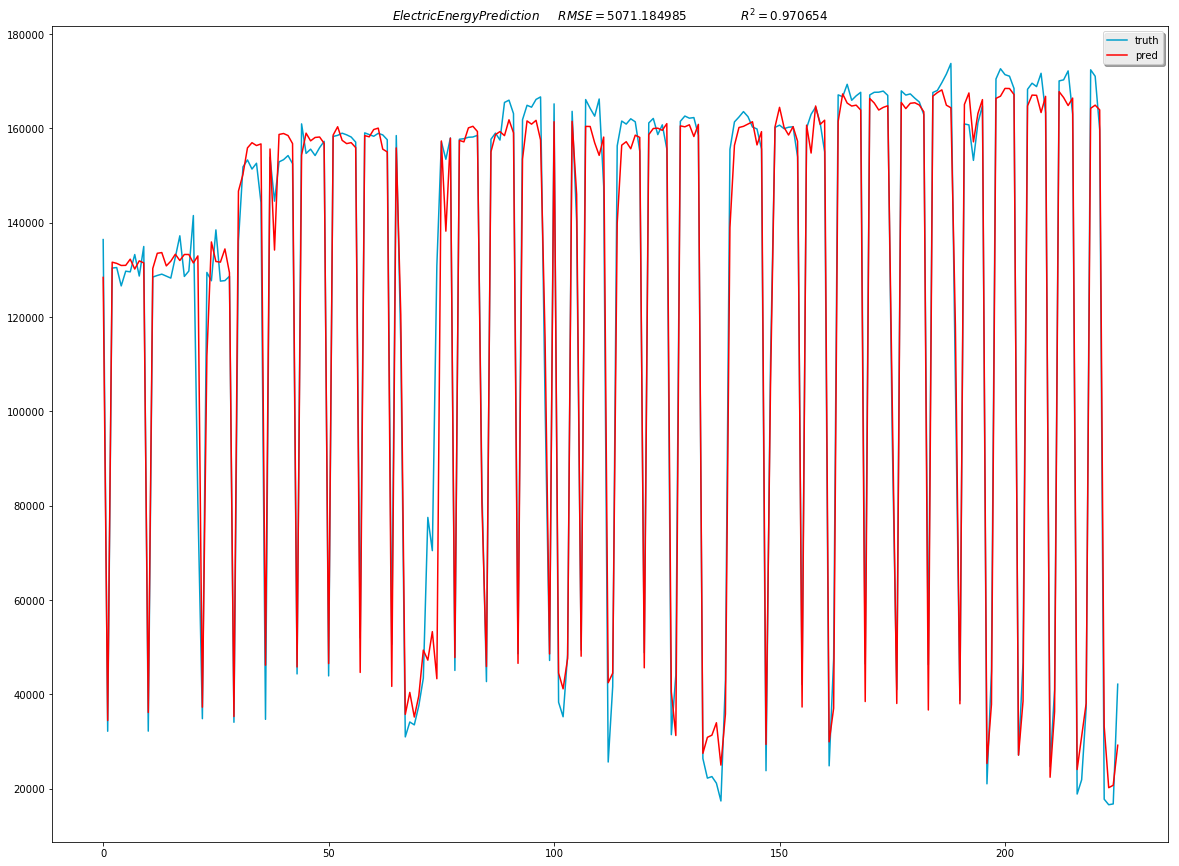

In [23]:
# ee = data.values[:,0]
# gas = data.values[:,1]
# x  = data.values[:,2:16]

y_show = xlf.predict(x)
rmse = (np.sqrt((ee[200:]-y_show[200:])**2)).mean()
score = r2_score(ee[200:],y_show[200:])
plt.figure(figsize=(20,15))
plt.title('$Electric Energy Prediction$     $RMSE = %f$              $R^2 = %f$'%(rmse,score))
plt.plot(ee[200:],c = '#009FCC',label = 'truth',linestyle='-')
plt.plot(y_show[200:],c = 'red',label = 'pred',linestyle='-')
plt.legend(shadow=True)

plt.show()

In [ ]:
y_show = xlf.predict(x)
rmse = (np.sqrt((ee[200:]-y_show[200:])**2)).mean()
rmse = (np.sqrt((ee[200:]-y_show[200:])**2))
score = r2_score(ee[200:],y_show[200:])
plt.figure(figsize=(20,15))
plt.title('$Electric Energy Prediction$     $RMSE = %f$              $R^2 = %f$'%(rmse,score))
plt.plot(ee[200:],c = '#009FCC',label = 'truth',linestyle='-')
plt.plot(y_show[200:],c = 'red',label = 'pred',linestyle='-')
plt.legend(shadow=True)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,gas,test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape)

parameters = {'max_depth':([3,4,5,6,7,8,9,10,15]),'learning_rate':(0.01,0.02,0.025,0.03,0.04,0.05,0.06,0.09,0.1,0.008),'n_estimators':[100,125,150,200,250,300,1000]}
xlf=xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=300)
clf = GridSearchCV(xlf,parameters,n_jobs=-1,cv=5)
clf.fit(X_train,y_train)
print(clf.best_score_,clf.best_params_)

(213, 14) (213, 14)
[0]	validation_0-rmse:21027.8
Will train until validation_0-rmse hasn't improved in 300 rounds.
[1]	validation_0-rmse:19137.6
[2]	validation_0-rmse:17431.7
[3]	validation_0-rmse:15912.7
[4]	validation_0-rmse:14545.2
[5]	validation_0-rmse:13315.8
[6]	validation_0-rmse:12239.4
[7]	validation_0-rmse:11255.3
[8]	validation_0-rmse:10399.1
[9]	validation_0-rmse:9625.13
[10]	validation_0-rmse:8966.48
[11]	validation_0-rmse:8342.79
[12]	validation_0-rmse:7821.46
[13]	validation_0-rmse:7336.74
[14]	validation_0-rmse:6937.5
[15]	validation_0-rmse:6568.42
[16]	validation_0-rmse:6268.81
[17]	validation_0-rmse:6010.35
[18]	validation_0-rmse:5782.55
[19]	validation_0-rmse:5583.48
[20]	validation_0-rmse:5418.21
[21]	validation_0-rmse:5263.88
[22]	validation_0-rmse:5143.94
[23]	validation_0-rmse:5008.11
[24]	validation_0-rmse:4904.13
[25]	validation_0-rmse:4802.7
[26]	validation_0-rmse:4732.36
[27]	validation_0-rmse:4662.22
[28]	validation_0-rmse:4606.62
[29]	validation_0-rmse:4569

In [17]:
xlf = xgb.XGBRegressor(max_depth=3, 
                        learning_rate=0.008, 
                        n_estimators=1000, 
                        silent=True, 
                        objective='reg:linear', 
                        nthread=-1, 
                        gamma=0,
                        min_child_weight=1, 
                        max_delta_step=0, 
                        subsample=0.85, 
                        colsample_bytree=0.7, 
                        colsample_bylevel=1, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        scale_pos_weight=1, 
                        seed=1440, 
                        missing=None)

xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)],early_stopping_rounds=1000)
preds = xlf.predict(X_test)

[0]	validation_0-rmse:22971.8
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:22804.6
[2]	validation_0-rmse:22639.3
[3]	validation_0-rmse:22473.4
[4]	validation_0-rmse:22307.5
[5]	validation_0-rmse:22143.9
[6]	validation_0-rmse:21979.6
[7]	validation_0-rmse:21816.7
[8]	validation_0-rmse:21656.9
[9]	validation_0-rmse:21497
[10]	validation_0-rmse:21342.1
[11]	validation_0-rmse:21185.3
[12]	validation_0-rmse:21029.2
[13]	validation_0-rmse:20878.3
[14]	validation_0-rmse:20727
[15]	validation_0-rmse:20582.2
[16]	validation_0-rmse:20433.3
[17]	validation_0-rmse:20285.1
[18]	validation_0-rmse:20138.9
[19]	validation_0-rmse:19990.7
[20]	validation_0-rmse:19847.1
[21]	validation_0-rmse:19703.3
[22]	validation_0-rmse:19561.1
[23]	validation_0-rmse:19416.2
[24]	validation_0-rmse:19277.9
[25]	validation_0-rmse:19141.7
[26]	validation_0-rmse:19004.2
[27]	validation_0-rmse:18865.6
[28]	validation_0-rmse:18729.6
[29]	validation_0-rmse:18598.6
[30]	validation_0

[259]	validation_0-rmse:5498.27
[260]	validation_0-rmse:5482.86
[261]	validation_0-rmse:5471.91
[262]	validation_0-rmse:5458.27
[263]	validation_0-rmse:5444.31
[264]	validation_0-rmse:5430.25
[265]	validation_0-rmse:5415.34
[266]	validation_0-rmse:5402.09
[267]	validation_0-rmse:5389.2
[268]	validation_0-rmse:5373.62
[269]	validation_0-rmse:5359.3
[270]	validation_0-rmse:5347
[271]	validation_0-rmse:5335.47
[272]	validation_0-rmse:5323.01
[273]	validation_0-rmse:5310.39
[274]	validation_0-rmse:5296.83
[275]	validation_0-rmse:5283.97
[276]	validation_0-rmse:5271.42
[277]	validation_0-rmse:5259.3
[278]	validation_0-rmse:5248.01
[279]	validation_0-rmse:5236.44
[280]	validation_0-rmse:5224.15
[281]	validation_0-rmse:5210.94
[282]	validation_0-rmse:5199.79
[283]	validation_0-rmse:5188.05
[284]	validation_0-rmse:5175.71
[285]	validation_0-rmse:5165.28
[286]	validation_0-rmse:5153.52
[287]	validation_0-rmse:5143.2
[288]	validation_0-rmse:5130.77
[289]	validation_0-rmse:5122.29
[290]	validatio

[517]	validation_0-rmse:4192.17
[518]	validation_0-rmse:4191.16
[519]	validation_0-rmse:4190
[520]	validation_0-rmse:4188.83
[521]	validation_0-rmse:4187.96
[522]	validation_0-rmse:4186.88
[523]	validation_0-rmse:4186.97
[524]	validation_0-rmse:4187.26
[525]	validation_0-rmse:4185.94
[526]	validation_0-rmse:4185.99
[527]	validation_0-rmse:4183.72
[528]	validation_0-rmse:4183.36
[529]	validation_0-rmse:4180.14
[530]	validation_0-rmse:4179.23
[531]	validation_0-rmse:4178.25
[532]	validation_0-rmse:4177.74
[533]	validation_0-rmse:4176.94
[534]	validation_0-rmse:4176.4
[535]	validation_0-rmse:4175.41
[536]	validation_0-rmse:4173.49
[537]	validation_0-rmse:4171.07
[538]	validation_0-rmse:4170.59
[539]	validation_0-rmse:4169.18
[540]	validation_0-rmse:4166.81
[541]	validation_0-rmse:4167.14
[542]	validation_0-rmse:4165.51
[543]	validation_0-rmse:4165.09
[544]	validation_0-rmse:4164.57
[545]	validation_0-rmse:4163.9
[546]	validation_0-rmse:4162.98
[547]	validation_0-rmse:4162.68
[548]	validat

[775]	validation_0-rmse:4069.55
[776]	validation_0-rmse:4069.54
[777]	validation_0-rmse:4069.76
[778]	validation_0-rmse:4069.21
[779]	validation_0-rmse:4069.21
[780]	validation_0-rmse:4067.85
[781]	validation_0-rmse:4067.89
[782]	validation_0-rmse:4067.03
[783]	validation_0-rmse:4066.98
[784]	validation_0-rmse:4067.64
[785]	validation_0-rmse:4067.87
[786]	validation_0-rmse:4068.04
[787]	validation_0-rmse:4067.56
[788]	validation_0-rmse:4066.51
[789]	validation_0-rmse:4066.47
[790]	validation_0-rmse:4067.1
[791]	validation_0-rmse:4067.61
[792]	validation_0-rmse:4067.64
[793]	validation_0-rmse:4066.82
[794]	validation_0-rmse:4067
[795]	validation_0-rmse:4066.78
[796]	validation_0-rmse:4066.57
[797]	validation_0-rmse:4065.94
[798]	validation_0-rmse:4065.68
[799]	validation_0-rmse:4064.94
[800]	validation_0-rmse:4065.54
[801]	validation_0-rmse:4066.15
[802]	validation_0-rmse:4066.21
[803]	validation_0-rmse:4066.59
[804]	validation_0-rmse:4065.46
[805]	validation_0-rmse:4065.11
[806]	valida

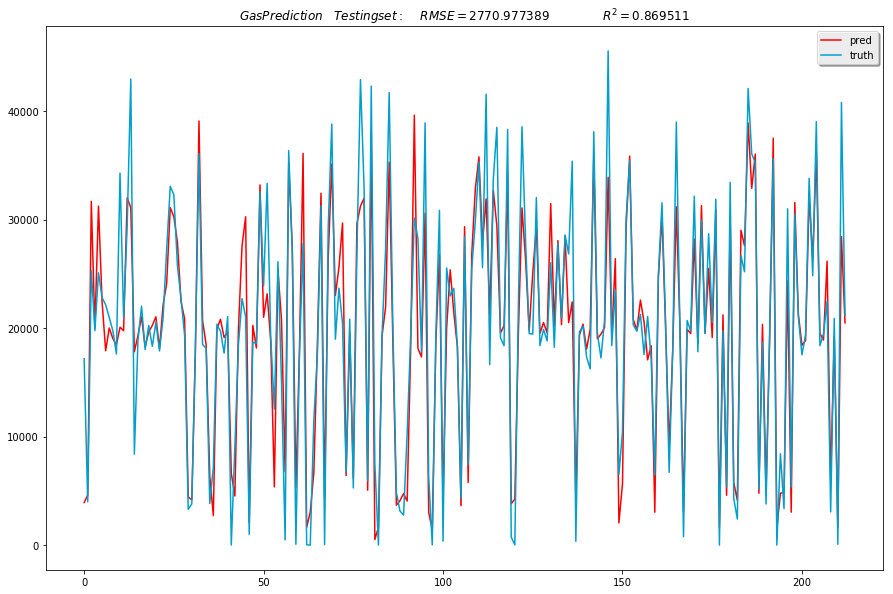

In [18]:
rmse = (np.sqrt((y_test-preds)**2)).mean()
score = r2_score(y_test,preds)
plt.figure(figsize=(15,10))
plt.title('$GasPrediction$   $Testing set:$    $RMSE = %f$              $R^2 = %f$'%(rmse,score))
plt.plot(preds,c = 'red',label = 'pred',linestyle='-')
plt.plot(y_test,c = '#009FCC',label = 'truth',linestyle='-')
plt.legend(shadow=True)
plt.show()